In [1]:
## importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt


In [3]:
fake_df = pd.read_csv('Fake.csv')
true_df = pd.read_csv('True.csv')

print(fake_df)
print(true_df)

                                                   title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was revealed that former Milwauk...    

In [4]:
## adding label to each for fake and true
fake_df['label'] = 0
true_df['label'] = 1


In [5]:
## merging them into one df
df = pd.concat([fake_df, true_df], axis=0)

df = df.reset_index(drop=True)

df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [6]:
## checking the merged data
print(df.shape)   # Kitni rows aur columns hai
print(df["label"].value_counts())   # Fake vs True count

(44898, 5)
label
0    23481
1    21417
Name: count, dtype: int64


In [7]:
## reshuffling the dataset
df = df.sample(frac=1).reset_index(drop=True)


In [8]:
df.head()

,title,text,subject,date,label
0,Non-Transgender Woman Harassed In Bathroom Af...,The atmosphere created by conservatives and th...,News,"May 16, 2016",0
1,Canada says most border-crossing asylum seeker...,OTTAWA (Reuters) - Most of the people crossing...,politicsNews,"March 10, 2017",1
2,New al Qaeda-linked group claims responsibilit...,CAIRO (Reuters) - A previously unknown militan...,worldnews,"November 3, 2017",1
3,Turkey's Erdogan blames U.S. envoy for diploma...,ANKARA (Reuters) - President Tayyip Erdogan bl...,politicsNews,"October 10, 2017",1
4,Zimbabwe cabinet pick to show if Mnangagwa is ...,HARARE (Reuters) - New Zimbabwean President Em...,worldnews,"November 27, 2017",1


In [9]:
## performing text cleaning

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required resources (run only once)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation, numbers, special chars
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Tokenize (split into words)
    words = text.split()
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Join back
    return " ".join(words)

# Apply cleaning to the text column
df["clean_text"] = df["text"].apply(clean_text)

# Check cleaned data
print(df[["text", "clean_text"]].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mdsaj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mdsaj\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mdsaj\AppData\Roaming\nltk_data...


                                                text  \
0  The atmosphere created by conservatives and th...   
1  OTTAWA (Reuters) - Most of the people crossing...   
2  CAIRO (Reuters) - A previously unknown militan...   
3  ANKARA (Reuters) - President Tayyip Erdogan bl...   
4  HARARE (Reuters) - New Zimbabwean President Em...   

                                          clean_text  
0  atmosphere created conservative anti transgend...  
1  ottawa reuters people crossing u border canada...  
2  cairo reuters previously unknown militant grou...  
3  ankara reuters president tayyip erdogan blamed...  
4  harare reuters new zimbabwean president emmers...  


In [10]:
## Handling missing values
print(df.isnull().sum())  # Check for missing values
print(df.duplicated().sum())  # Check for duplicate rows

title         0
text          0
subject       0
date          0
label         0
clean_text    0
dtype: int64
209


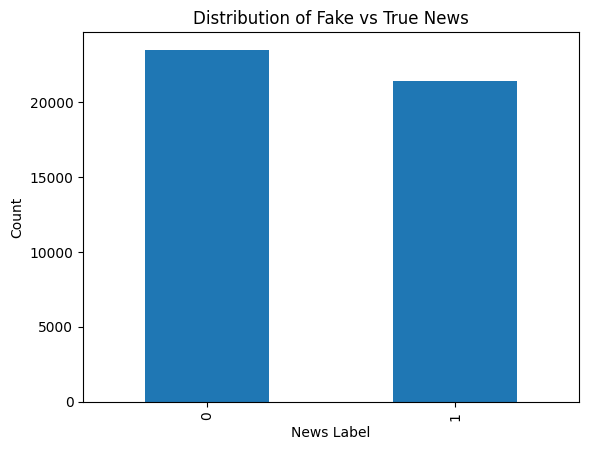

In [12]:
## Analyzing the ratio of label distribution
import matplotlib.pyplot as plt

df['label'].value_counts().plot(kind='bar')
plt.title("Distribution of Fake vs True News")
plt.xlabel("News Label")
plt.ylabel("Count")
plt.show()

         char_count    word_count
count  44898.000000  44898.000000
mean    1696.220611    234.211323
std     1507.517138    204.957460
min        0.000000      0.000000
25%      850.000000    120.000000
50%     1485.000000    207.000000
75%     2121.000000    294.000000
max    37990.000000   4975.000000


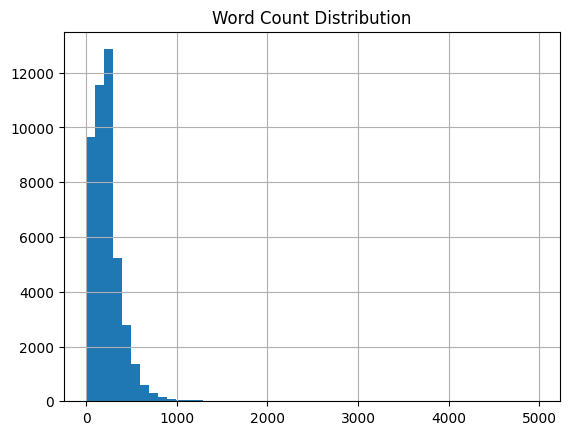

In [13]:
## Text length analysis

df['char_count'] = df['clean_text'].apply(len)
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))

print(df[['char_count','word_count']].describe())

# Histogram plot
df['word_count'].hist(bins=50)
plt.title("Word Count Distribution")
plt.show()

In [14]:
from collections import Counter

# Sab text ko ek list me le lo
all_words = " ".join(df['text']).split()

common_words = Counter(all_words).most_common(20)
print(common_words)

[('the', 905825), ('to', 529815), ('of', 437532), ('and', 392470), ('a', 390084), ('in', 322378), ('that', 220928), ('on', 181758), ('s', 172259), ('for', 166256), ('is', 160009), ('was', 114171), ('with', 113690), ('he', 105668), ('Trump', 101305), ('as', 96723), ('The', 95236), ('said', 93137), ('by', 92699), ('his', 92058)]


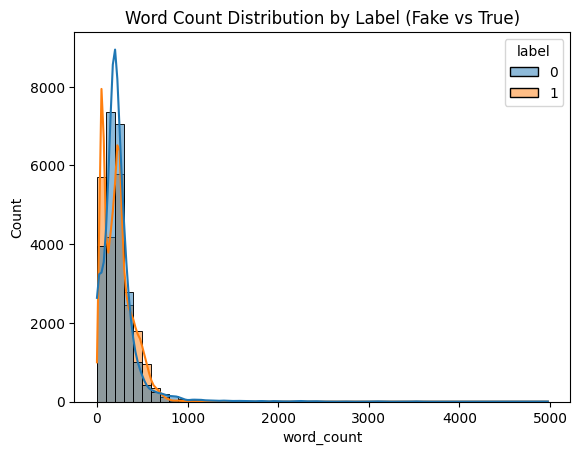

In [15]:
## Comparing true and fake news word counts
sns.histplot(data=df, x="word_count", hue="label", bins=50, kde=True)
plt.title("Word Count Distribution by Label (Fake vs True)")
plt.show()

In [16]:
## Finding most common words of fake and true news

# Fake news 
fake_words = " ".join(df[df['label']==0]['clean_text']).split()
fake_common = Counter(fake_words).most_common(20)

# True news 
true_words = " ".join(df[df['label']==1]['clean_text']).split()
true_common = Counter(true_words).most_common(20)

print("Fake News Common Words:", fake_common)
print("True News Common Words:", true_common)

Fake News Common Words: [('trump', 80106), ('said', 33763), ('president', 28406), ('people', 26678), ('one', 25451), ('u', 24812), ('state', 23667), ('would', 23566), ('clinton', 19866), ('time', 19225), ('year', 19074), ('obama', 18838), ('like', 18668), ('american', 18127), ('donald', 17790), ('republican', 16756), ('say', 15784), ('also', 15420), ('right', 14862), ('news', 14688)]
True News Common Words: [('said', 99062), ('trump', 54734), ('u', 47144), ('state', 37678), ('would', 31605), ('reuters', 28976), ('president', 28729), ('republican', 23007), ('year', 22622), ('government', 19992), ('house', 17030), ('new', 16917), ('also', 15954), ('united', 15590), ('people', 15356), ('party', 15294), ('election', 14759), ('official', 14620), ('told', 14245), ('country', 14161)]


In [17]:
df.head()

,title,text,subject,date,label,clean_text,char_count,word_count
0,Non-Transgender Woman Harassed In Bathroom Af...,The atmosphere created by conservatives and th...,News,"May 16, 2016",0,atmosphere created conservative anti transgend...,1931,273
1,Canada says most border-crossing asylum seeker...,OTTAWA (Reuters) - Most of the people crossing...,politicsNews,"March 10, 2017",1,ottawa reuters people crossing u border canada...,1669,227
2,New al Qaeda-linked group claims responsibilit...,CAIRO (Reuters) - A previously unknown militan...,worldnews,"November 3, 2017",1,cairo reuters previously unknown militant grou...,2692,394
3,Turkey's Erdogan blames U.S. envoy for diploma...,ANKARA (Reuters) - President Tayyip Erdogan bl...,politicsNews,"October 10, 2017",1,ankara reuters president tayyip erdogan blamed...,2473,333
4,Zimbabwe cabinet pick to show if Mnangagwa is ...,HARARE (Reuters) - New Zimbabwean President Em...,worldnews,"November 27, 2017",1,harare reuters new zimbabwean president emmers...,2350,321


In [18]:
## Choosing the relevant features for training

X = df['clean_text']
y = df['label']


In [19]:
## Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (35918,)
X_test shape: (8980,)
y_train shape: (35918,)
y_test shape: (8980,)


In [21]:
## TF - IDF vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  
# max_features -> top 5000 words
# ngram_range=(1,2) -> unigrams + bigrams

# Fit on training data and transform both train & test
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("Train shape:", X_train_tfidf.shape)
print("Test shape:", X_test_tfidf.shape)


Train shape: (35918, 5000)
Test shape: (8980, 5000)


In [22]:
## Model training
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [23]:
## Prediction and Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = lr.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.988641425389755
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Confusion Matrix:
 [[4639   57]
 [  45 4239]]


In [25]:
## Cross-validation score
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X_train_tfidf, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.98761136 0.98886414 0.98496659 0.98774885 0.98677433]
Mean accuracy: 0.9871930546542241


In [26]:
## Saving the model

import joblib

joblib.dump(lr, 'fake_news_model.pkl')

['fake_news_model.pkl']

In [27]:
## Creating a pipeline

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Pipeline bna ke directly save kar
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", LogisticRegression())
])

# Train
pipeline.fit(X_train, y_train)

# Save pipeline
joblib.dump(pipeline, "spam_pipeline.pkl")

# For future use
loaded_pipeline = joblib.load("spam_pipeline.pkl")
print(loaded_pipeline.predict(["Free entry in 2 min!"]))


[0]
